## Inspect the metadata CSV

In [45]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
meta = pd.read_csv('metadata.csv')

In [3]:
meta.head()

,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,full_text_file
0,NaN,Elsevier,Intrauterine virus infections and congenital h...,10.1016/0002-8703(72)90077-4,NaN,4361535.0,els-covid,Abstract The etiologic basis for the vast majo...,1972-12-31,"Overall, James C.",American Heart Journal,NaN,NaN,False,custom_license
1,NaN,Elsevier,Coronaviruses in Balkan nephritis,10.1016/0002-8703(80)90355-5,NaN,6243850.0,els-covid,NaN,1980-03-31,"Georgescu, Leonida; Diosi, Peter; Buţiu, Ioan;...",American Heart Journal,NaN,NaN,False,custom_license
2,NaN,Elsevier,Cigarette smoking and coronary heart disease: ...,10.1016/0002-8703(80)90356-7,NaN,7355701.0,els-covid,NaN,1980-03-31,"Friedman, Gary D",American Heart Journal,NaN,NaN,False,custom_license
3,aecbc613ebdab36753235197ffb4f35734b5ca63,Elsevier,Clinical and immunologic studies in identical ...,10.1016/0002-9343(73)90176-9,NaN,4579077.0,els-covid,"Abstract Middle-aged female identical twins, o...",1973-08-31,"Brunner, Carolyn M.; Horwitz, David A.; Shann,...",The American Journal of Medicine,NaN,NaN,True,custom_license
4,NaN,Elsevier,Epidemiology of community-acquired respiratory...,10.1016/0002-9343(85)90361-4,NaN,4014285.0,els-covid,Abstract Upper respiratory tract infections ar...,1985-06-28,"Garibaldi, Richard A.",The American Journal of Medicine,NaN,NaN,False,custom_license


In [4]:
meta.shape

(44220, 15)

In [5]:
meta.describe()

,pubmed_id,Microsoft Academic Paper ID
count,2.294300e+04,9.640000e+02
mean,2.337271e+07,2.709918e+09
std,7.218084e+06,4.839708e+08
min,3.506000e+03,3.912630e+07
25%,1.938220e+07,2.393002e+09
50%,2.503855e+07,3.003251e+09
75%,2.901773e+07,3.005639e+09
max,3.217991e+07,3.006672e+09


In [13]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44220 entries, 0 to 44219
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sha                          28462 non-null  object 
 1   source_x                     44220 non-null  object 
 2   title                        43996 non-null  object 
 3   doi                          40750 non-null  object 
 4   pmcid                        23319 non-null  object 
 5   pubmed_id                    22943 non-null  float64
 6   license                      44220 non-null  object 
 7   abstract                     35806 non-null  object 
 8   publish_time                 34197 non-null  object 
 9   authors                      41074 non-null  object 
 10  journal                      33173 non-null  object 
 11  Microsoft Academic Paper ID  964 non-null    float64
 12  WHO #Covidence               1767 non-null   object 
 13  has_full_text   

### Percent nulls for the dataframe?

In [21]:
for gah in meta.columns:
    nulls = sum(meta[gah].isnull())
    print(gah,"\t", np.round((nulls / meta.shape[0])*100,3))

sha 	 35.635
source_x 	 0.0
title 	 0.507
doi 	 7.847
pmcid 	 47.266
pubmed_id 	 48.116
license 	 0.0
abstract 	 19.028
publish_time 	 22.666
authors 	 7.114
journal 	 24.982
Microsoft Academic Paper ID 	 97.82
WHO #Covidence 	 96.004
has_full_text 	 0.0
full_text_file 	 25.76


### How many and what are the unique values for some of the columns?

In [38]:
#get object cols
object_cols = [col for col in meta.columns if meta[col].dtype == 'O' ]
for gah in object_cols:
    counts = len(meta[gah].value_counts())
    print(gah, "\t", counts)

sha 	 28450
source_x 	 7
title 	 42230
doi 	 40750
pmcid 	 23319
license 	 13
abstract 	 35099
publish_time 	 7045
authors 	 39285
journal 	 3945
WHO #Covidence 	 1767
full_text_file 	 4


## Show distrbutions for the ones that actually make sense

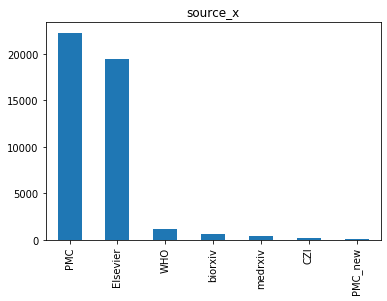

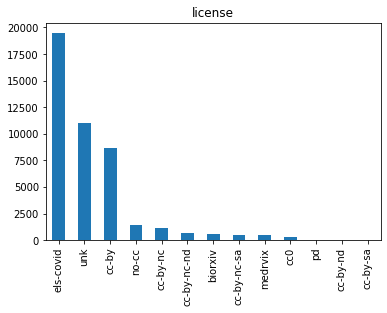

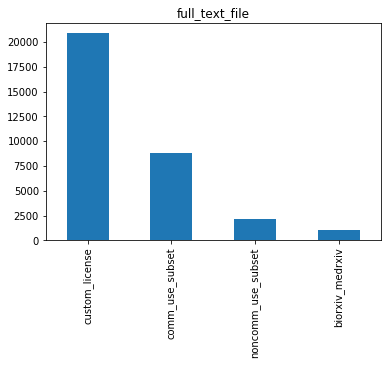

In [62]:
object_cols = ['source_x', 'license','full_text_file']
for gah in object_cols:
    meta[gah].value_counts().plot.bar()
    plt.title(gah)
    plt.show()

## Get countsplots for jounral and who covidence
* what does covidence even mean

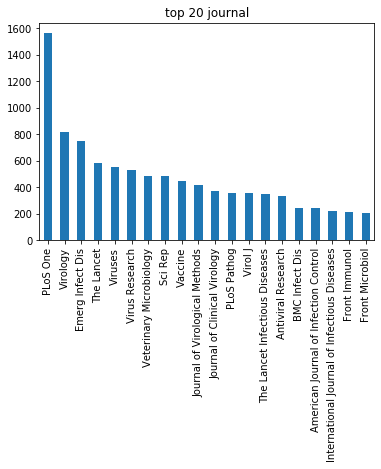

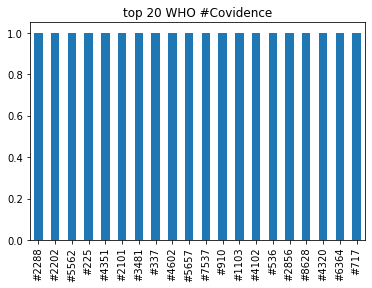

In [141]:
object_cols = ['journal','WHO #Covidence']
for gah in object_cols:
    df = meta[gah].value_counts()[:20]
    df.plot.bar()
    plt.title('top 20 '+str(gah))
    plt.show()

PLos one!!!

PLos pathology has a good impact factor

### Number of publications of covid 19 through the years

In [150]:
def split_year(x):
    if str(x) == 'nan':
        return(np.nan)
    else:
        try:
         return(float("".join(list(x)[:4])))
        except:
            return(np.nan)

meta['year'] = meta['publish_time'].apply(split_year)

In [151]:
meta['year']

0        1972.0
1        1980.0
2        1980.0
3        1973.0
4        1985.0
          ...  
44215    2017.0
44216    2009.0
44217    2018.0
44218    2011.0
44219    2017.0
Name: year, Length: 44220, dtype: float64

Text(0.5, 1.0, 'Covid 19 publications througout the years')

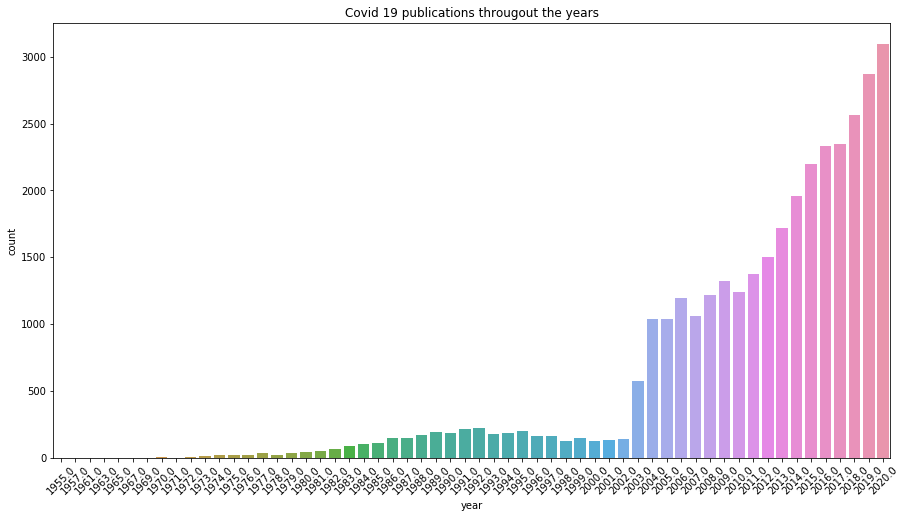

In [154]:
plt.figure(figsize=(15,8))
sns.countplot(data=meta, x='year')
plt.xticks(rotation=45)
plt.title('Covid 19 publications througout the years')

In [155]:
meta.head()

,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,full_text_file,year
0,NaN,Elsevier,Intrauterine virus infections and congenital h...,10.1016/0002-8703(72)90077-4,NaN,4361535.0,els-covid,Abstract The etiologic basis for the vast majo...,1972-12-31,"Overall, James C.",American Heart Journal,NaN,NaN,False,custom_license,1972.0
1,NaN,Elsevier,Coronaviruses in Balkan nephritis,10.1016/0002-8703(80)90355-5,NaN,6243850.0,els-covid,NaN,1980-03-31,"Georgescu, Leonida; Diosi, Peter; Buţiu, Ioan;...",American Heart Journal,NaN,NaN,False,custom_license,1980.0
2,NaN,Elsevier,Cigarette smoking and coronary heart disease: ...,10.1016/0002-8703(80)90356-7,NaN,7355701.0,els-covid,NaN,1980-03-31,"Friedman, Gary D",American Heart Journal,NaN,NaN,False,custom_license,1980.0
3,aecbc613ebdab36753235197ffb4f35734b5ca63,Elsevier,Clinical and immunologic studies in identical ...,10.1016/0002-9343(73)90176-9,NaN,4579077.0,els-covid,"Abstract Middle-aged female identical twins, o...",1973-08-31,"Brunner, Carolyn M.; Horwitz, David A.; Shann,...",The American Journal of Medicine,NaN,NaN,True,custom_license,1973.0
4,NaN,Elsevier,Epidemiology of community-acquired respiratory...,10.1016/0002-9343(85)90361-4,NaN,4014285.0,els-covid,Abstract Upper respiratory tract infections ar...,1985-06-28,"Garibaldi, Richard A.",The American Journal of Medicine,NaN,NaN,False,custom_license,1985.0


In [169]:
meta['authors'][4545]

'Timsit, S.'